# The Most Prestigious Nobel Prize

## The **Nobel Prize** is the world's most renowned scientific award, established by **Alfred Nobel (1833-1896)**. It honors recipients with a gold medal, prestige, and 
## substantial prize money in categories such as **chemistry, literature, physics, physiology or medicine, economics, and peace**. Since its inception in **1901**, the Nobel 
## Prize has evolved from being Eurocentric and male-focused to a more inclusive recognition. To explore this, we'll analyze a dataset of all prize winners from **1901 to** 
## **2016**.


In [3]:
#loading the required libs
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
#reading and takig a loook at first couple of winners
nobel <- read_csv("datasets/nobel.csv")
head(nobel)

Rows: 911 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): category, prize, motivation, prize_share, laureate_type, full_nam...
dbl   (2): year, laureate_id
date  (2): birth_date, death_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>
1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NA,NA,NA,1907-09-07,Châtenay,France
1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths""",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NA,NA,NA,1910-10-30,Heiden,Switzerland
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NA,NA,NA,1912-06-12,Paris,France
1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him""",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


# 2. Who Gets the Nobel Prize?

## Let's start by looking at the first few Nobel Prize winners, also called Nobel laureates.
## One famous winner is Wilhelm Conrad Röntgen, who discovered X-rays. In 1901, all the winners were men from Europe.

## But let's look at all the winners from 1901 to 2016. We want to know which gender and which country are the most common among the winners. 
## We'll use the country where the winners were born because the country of the organization is not available for shared Nobel Prizes.

In [7]:
# Counting the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
nobel %>% count()

# Counting the number of prizes won by male and female recipients.
nobel %>%
    count(sex)

# Counting the number of prizes won by different nationalities.
nobel %>%
    count(birth_country) %>%
    arrange(desc(n)) %>%
    head(20)

n
<int>
911


sex,n
<chr>,<int>
Female,49
Male,836
NA,26


birth_country,n
<chr>,<int>
United States of America,259
United Kingdom,85
Germany,61
France,51
Sweden,29
NA,26
Japan,24
Canada,18
Netherlands,18



# 3. USA dominance

## Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. 
## But in 1901 all the laureates were European. When did the USA start to dominate the Nobel Prize charts?


In [8]:
# Calculating the proportion of USA born winners per decade
prop_usa_winners <- nobel %>% 
    mutate(
        usa_born_winner = birth_country == "United States of America",
        decade = floor(year / 10) * 10
    ) %>%
    group_by(decade) %>%
    summarize(proportion = mean(usa_born_winner, na.rm = TRUE))

# Display the proportions of USA born winners per decade
prop_usa_winners

decade,proportion
<dbl>,<dbl>
1900,0.01785714
1910,0.07894737
1920,0.07407407
1930,0.25454545
1940,0.32500000
1950,0.29577465
1960,0.28000000
1970,0.32038835
1980,0.32978723


# 4. USA dominance, visualized

## A table is ok, but to see when the USA started to dominate the Nobel Charts we need a plot!

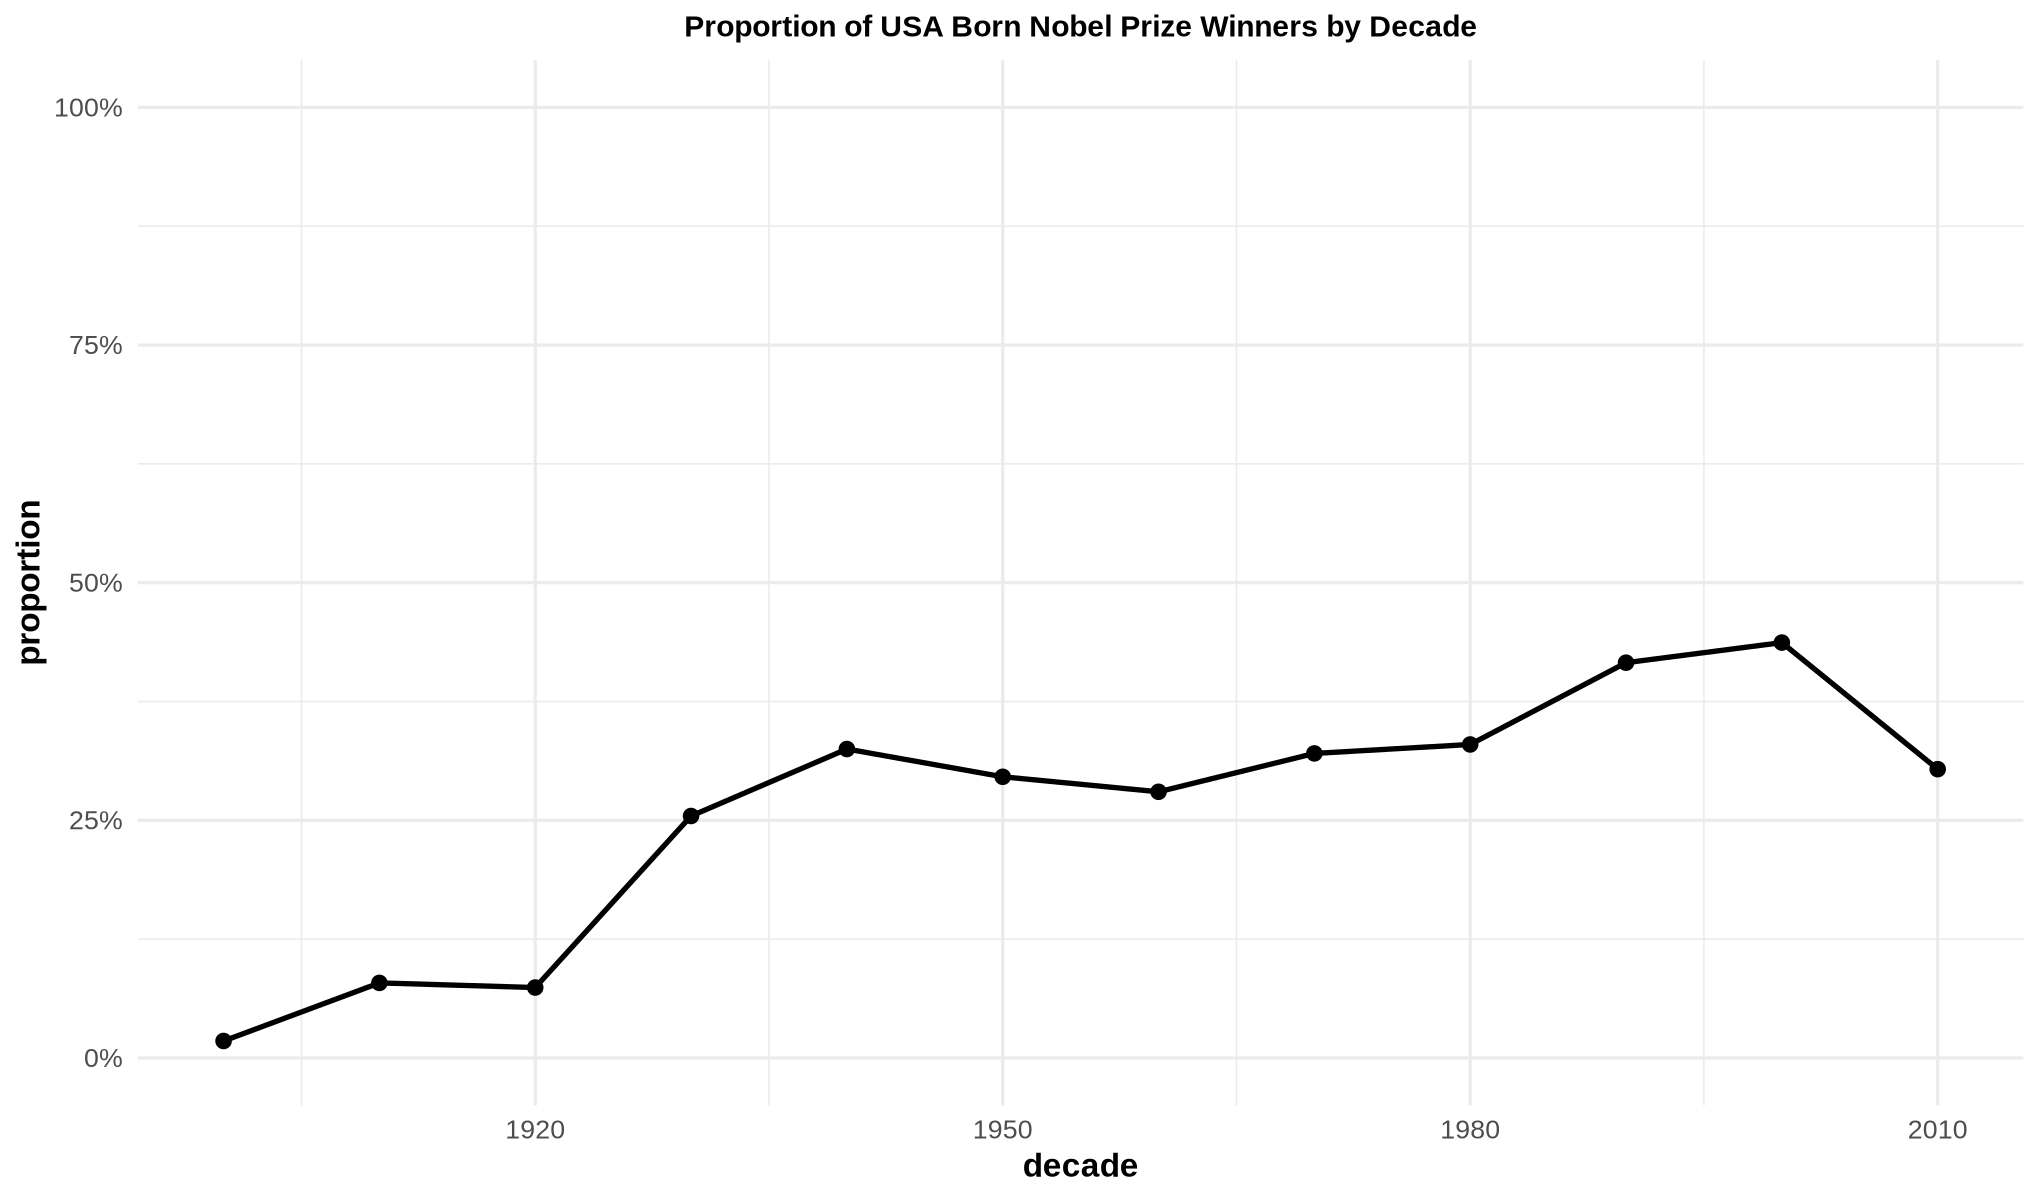

In [92]:
# Setting the size of plots in this notebook
options(repr.plot.width=17, repr.plot.height=10)

# Plotting USA born winners
ggplot(prop_usa_winners, aes(x = decade, y = proportion)) +
    geom_line(size = 1.5) +
    geom_point(size = 4) +
    scale_y_continuous(labels = scales::percent, limits = 0:1) +
    ggtitle("Proportion of USA Born Nobel Prize Winners by Decade")+ 
    theme_minimal(base_size = 20) +
    theme(
        plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
        axis.title.x = element_text(face = "bold"),
        axis.title.y = element_text(face = "bold")
    )


# 5. What is the gender of a typical Nobel Prize winner?

## So the USA became the dominating winner of the Nobel Prize first in the 1930s and has kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?


`summarise()` has grouped output by 'decade'. You can override using the
`.groups` argument.


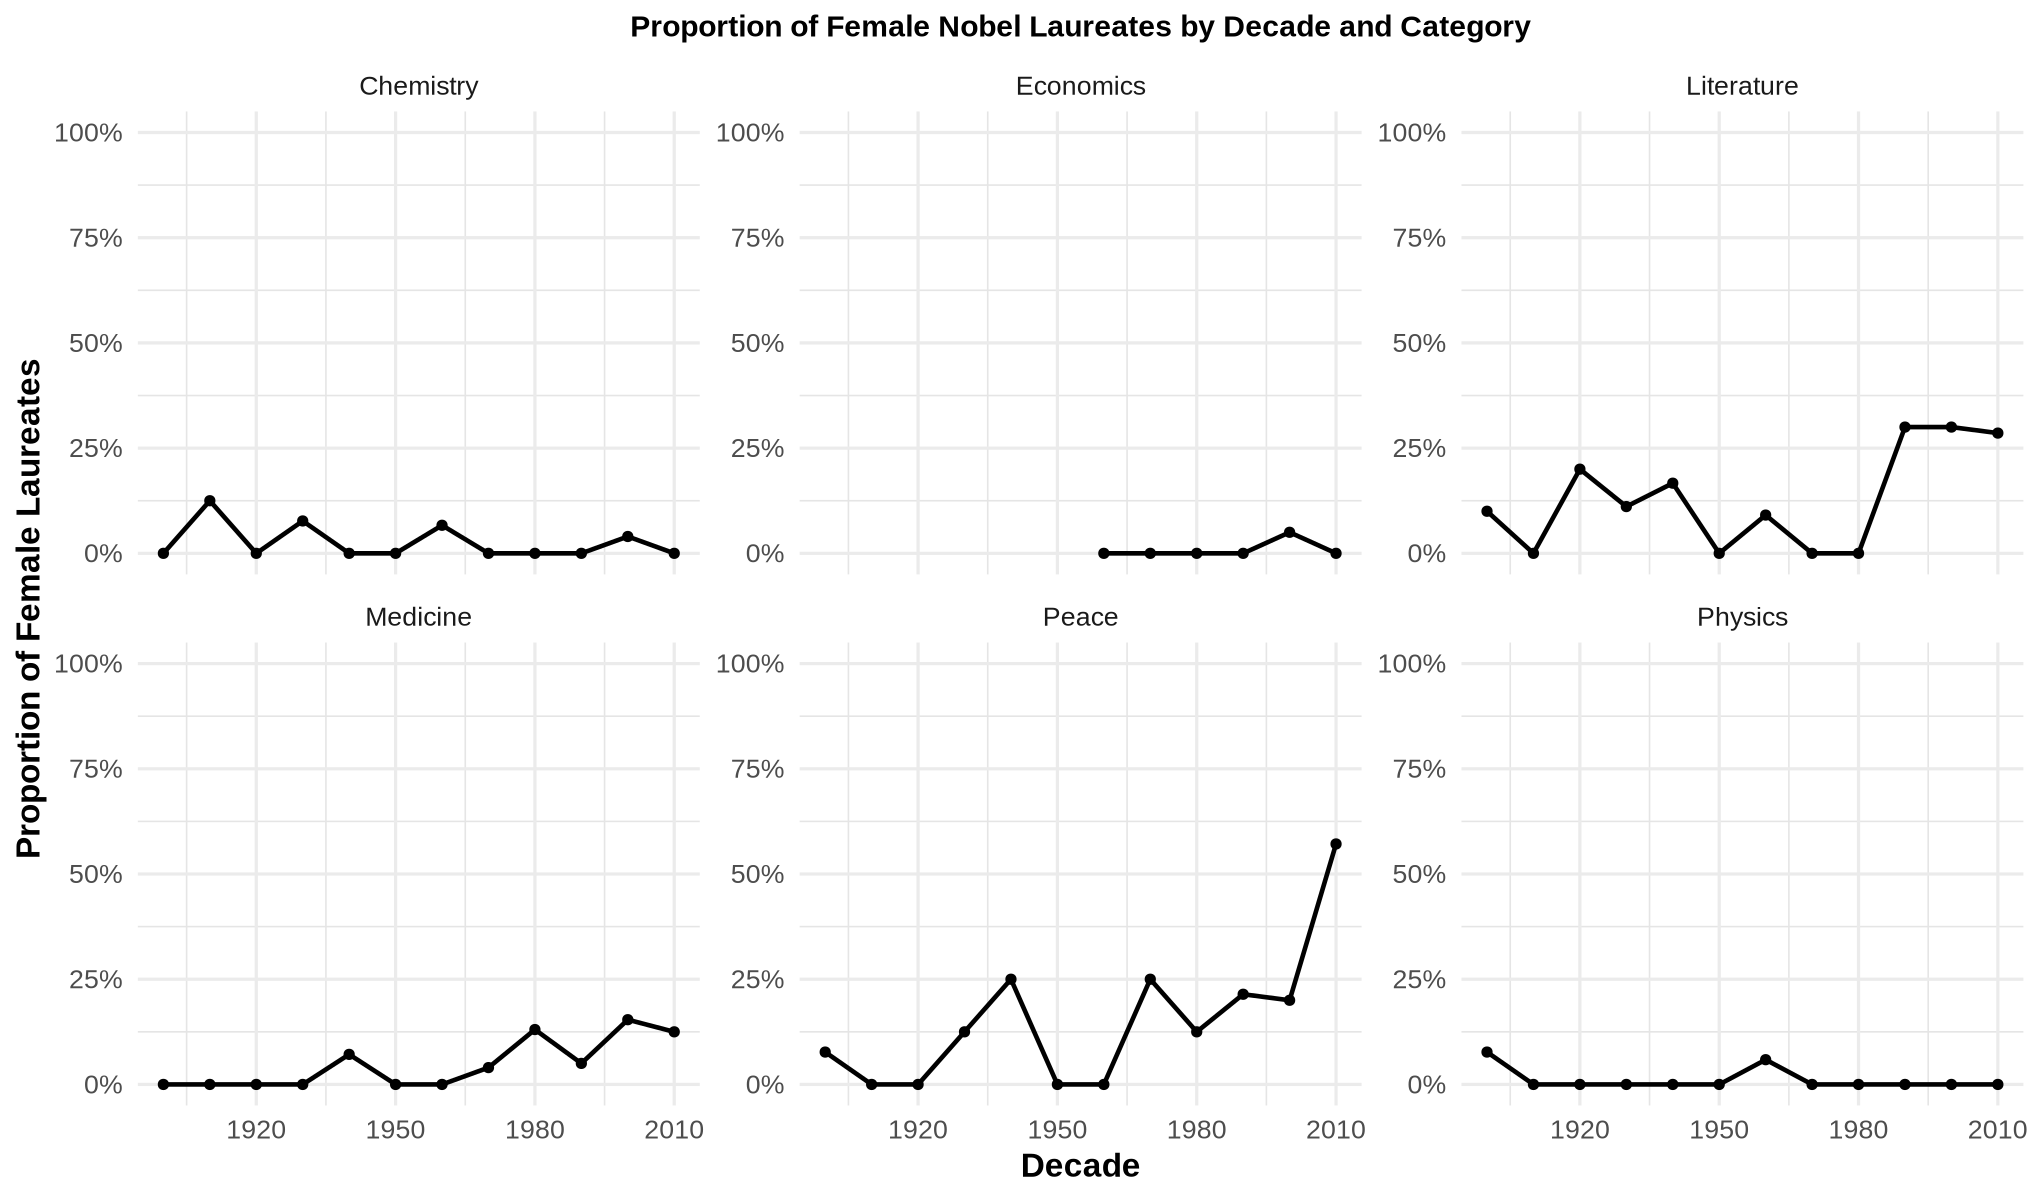

In [94]:
# Setting the size of plots in this notebook
options(repr.plot.width=17, repr.plot.height=10)

# Calculating the proportion of female laureates per decade
prop_female_winners <- nobel %>%
    mutate(
        female_winner = sex == "Female",
        decade = floor(year / 10) * 10
    ) %>%
    group_by(decade, category) %>%
    summarize(proportion = mean(female_winner, na.rm = TRUE))
# Plotting the proportion of female laureates per decade with facets for categories # nolint
ggplot(prop_female_winners, aes(x = decade, y = proportion)) +
    geom_line(size = 1.3) +
    geom_point(size = 2.5) +
    facet_wrap(~ category, scales = "free_y") +
    scale_y_continuous(labels = scales::percent, limits = 0:1) +
    labs(
        title = "Proportion of Female Nobel Laureates by Decade and Category",
        x = "Decade",
        y = "Proportion of Female Laureates"
    ) +
    theme_minimal(base_size = 20) +
    theme(
        plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
        axis.title.x = element_text(face = "bold"), 
        axis.title.y = element_text(face = "bold"),
        panel.grid.minor = element_line(color = "grey90")
    )


# 6. The First Woman to Win the Nobel Prize

## The data shows some interesting trends and patterns. Overall, the gender imbalance is quite large, with physics, economics, and chemistry having the largest disparities. Medicine shows a somewhat positive trend, and since the 1990s, the literature prize has become more balanced. The peace prize during the 2010s stands out as an exception, but this data only covers the years 2010 to 2016.

## Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [97]:
# picking the first woman to win the Nobel Prize
nobel %>%
    filter(sex == "Female") %>%
    top_n(1, desc(year))%>%
    select(full_name)  


full_name
<chr>
"Marie Curie, née Sklodowska"



# 7. Repeat laureates

## For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and there are few that have gotten it more than once. Who are these lucky few?


In [62]:
# Selecting the laureates that have received 2 or more prizes.
nobel %>%
    count(full_name) %>%
    filter(n > 1)

full_name,n
<chr>,<int>
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Frederick Sanger,2
John Bardeen,2
Linus Carl Pauling,2
"Marie Curie, née Sklodowska",2
Office of the United Nations High Commissioner for Refugees (UNHCR),2



# 8. How old are you when you get the prize?

## The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

## But how old are you generally when you get the prize?


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 28 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 28 rows containing missing values or values outside the scale range
(`geom_point()`).”


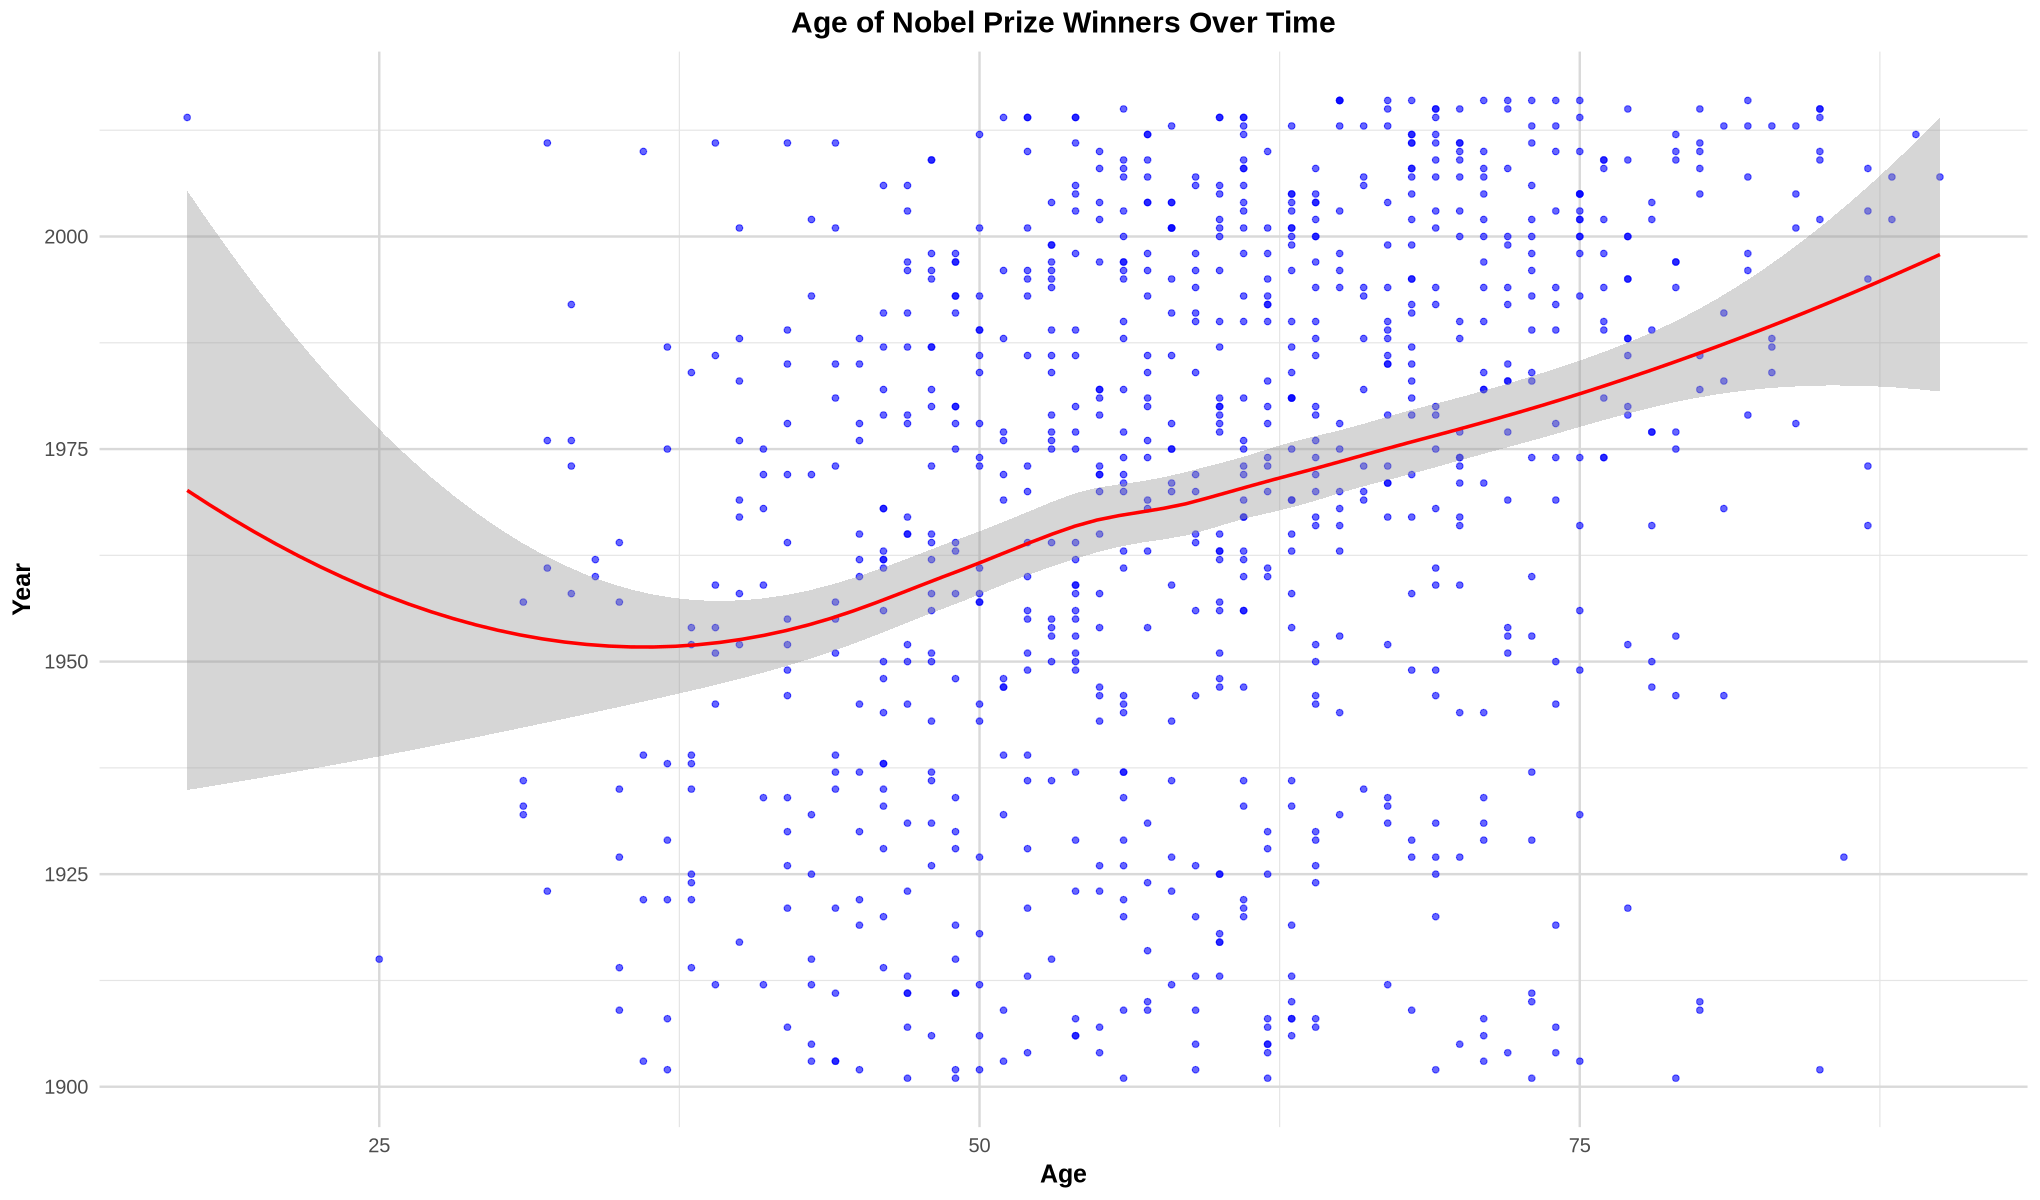

In [85]:
# Loading the lubridate package
library(lubridate)

# Calculating the age of Nobel Prize winners
nobel_age <- nobel %>%
    mutate(age = year - year(birth_date))

# Plotting the age of Nobel Prize winners
ggplot(nobel_age, aes(x = age, y = year)) +
    geom_point(alpha = 0.6, color = "blue") +
    geom_smooth(method = "auto", color = "red", size = 1) +
    labs(
        title = "Age of Nobel Prize Winners Over Time",
        x = "Age",
        y = "Year"
    ) +
    theme_minimal(base_size = 15) +
    theme(
        plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
        axis.title.x = element_text(face = "bold"),
        axis.title.y = element_text(face = "bold"),
        panel.grid.major = element_line(color = "grey85"),
        panel.grid.minor = element_line(color = "grey90")
    )


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 28 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 28 rows containing missing values or values outside the scale range
(`geom_point()`).”


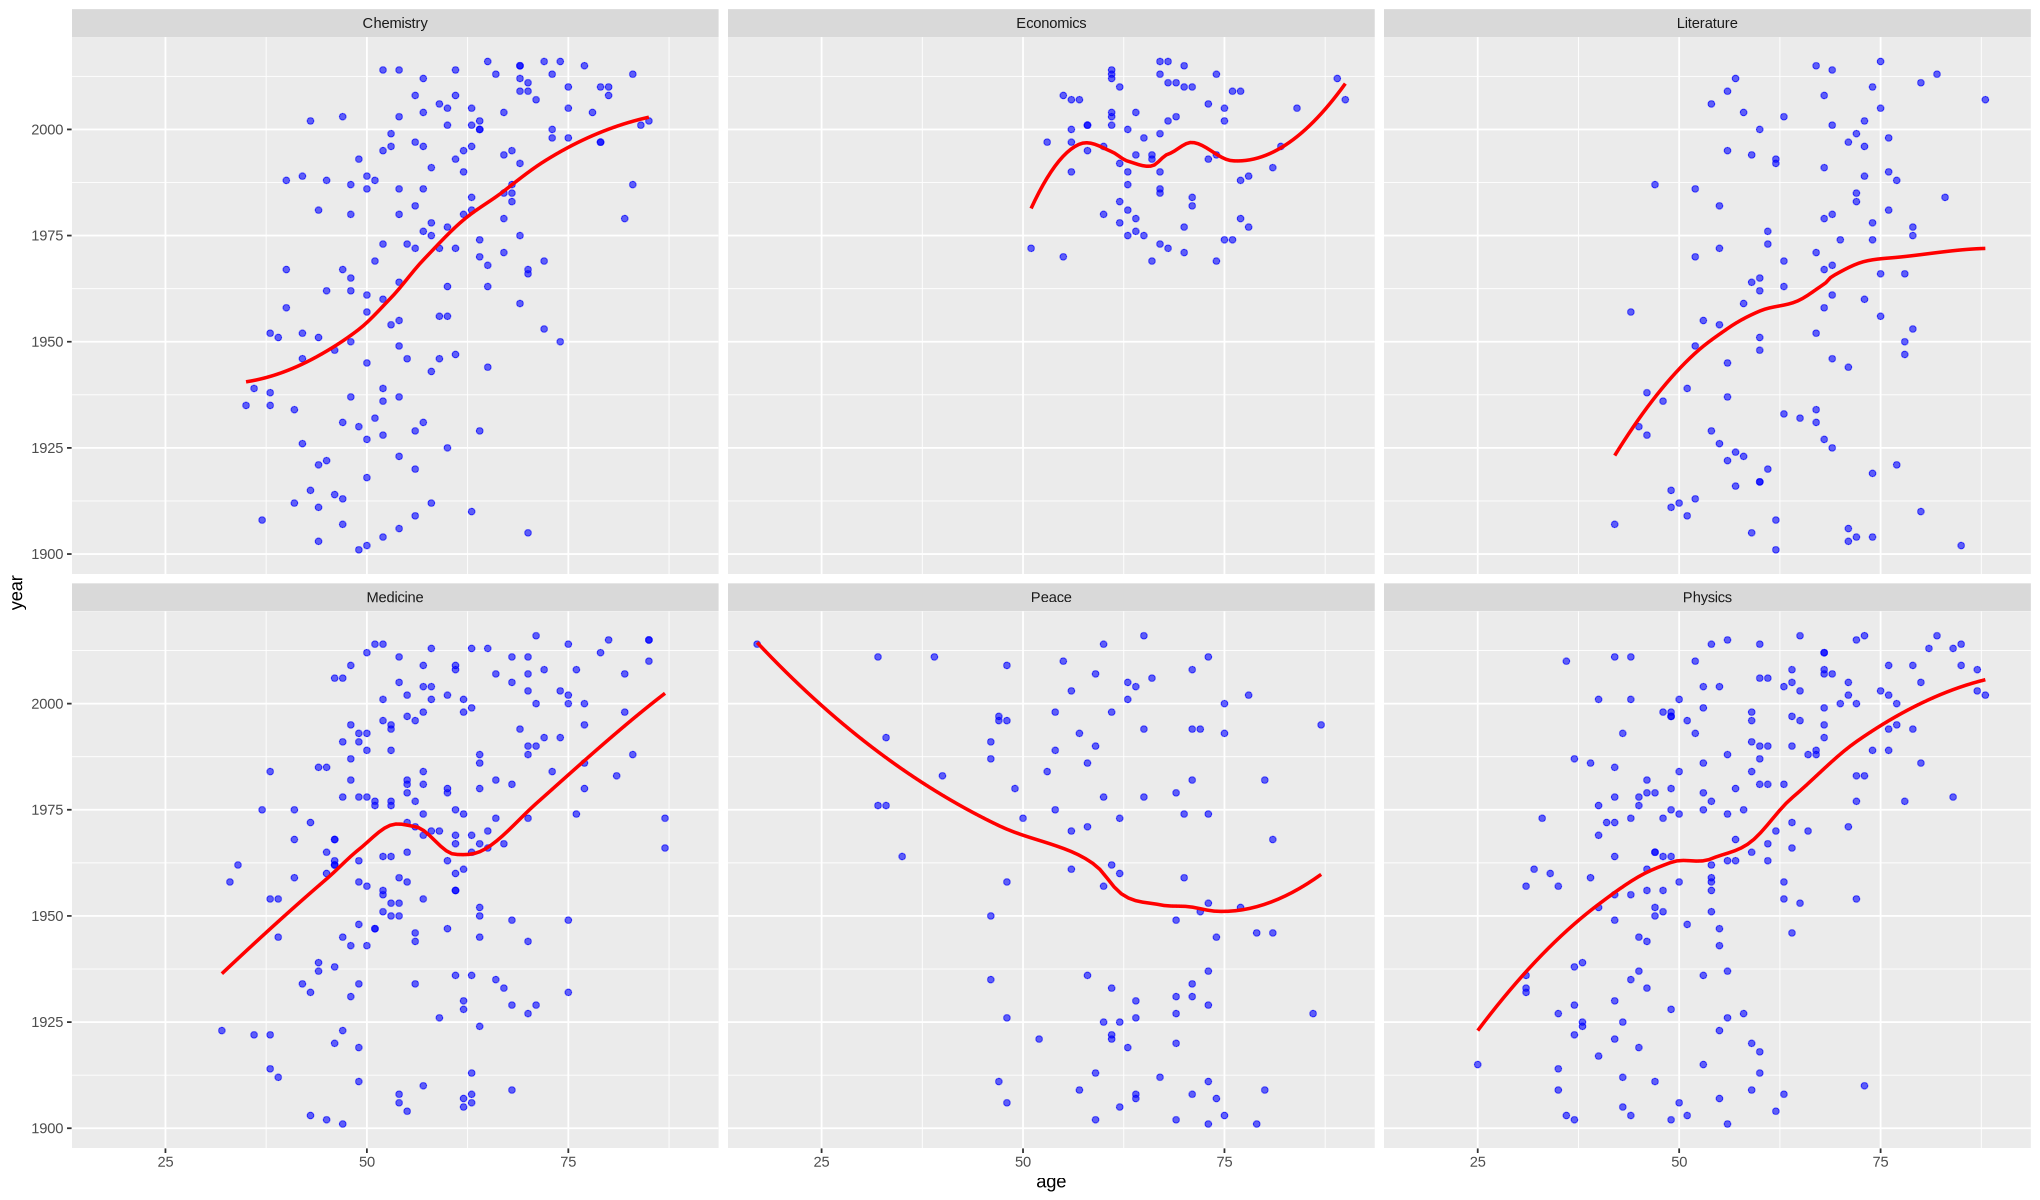

In [77]:
# Same plot as above, but faceted by the category of the Nobel Prize
options(repr.plot.width = 17, repr.plot.height = 10)
ggplot(nobel_age, aes(x = age, y = year)) +
    geom_point(alpha = 0.6, color = "blue") +
    geom_smooth(se = FALSE, color = "red") +
    facet_wrap(~ category)


# 10. Oldest and youngest winners

## Another plot with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable, and we also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

## In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?


In [83]:
# The oldest winner of a Nobel Prize as of 2016
nobel_age %>% top_n(1, age)

# The youngest winner of a Nobel Prize as of 2016
nobel_age %>% top_n(1, desc(age))

year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>
2007,Economics,The Sveriges Riksbank Prize in Economic Sciences 2007,"""for having laid the foundations of mechanism design theory""",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90


year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>
2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of children and young people and for the right of all children to education""",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NA,NA,NA,NA,NA,NA,17


## Lastly, let us know the name of the youngest winner ever, who in 2014 received the prize for her struggle against the suppression of children and young people and for the right of all children to education."

In [25]:
nobel_youngest_female <- nobel %>%
  mutate(age = year - year(birth_date)) %>%
  filter(sex == "Female") %>%
  arrange(age) %>%
  slice(1) %>%
  select(full_name, age)

nobel_youngest_female



full_name,age
<chr>,<dbl>
Malala Yousafzai,17
